In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the dataset
df = pd.read_csv('/content/netflix_titles.csv')

# Preview the dataset
print(df.head())

# Cleaning the data
df.dropna(subset=['type', 'release_year'], inplace=True)

# Convert 'release_year' to integer
df['release_year'] = df['release_year'].astype(int)

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

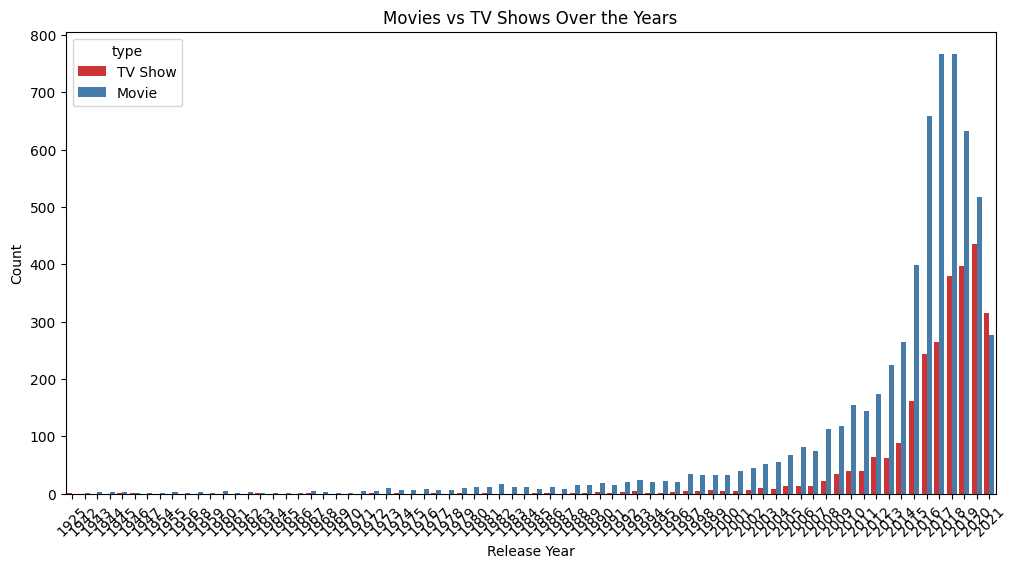

In [3]:
# 1. Distribution of Movies and TV Shows over the Years
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='release_year', hue='type', palette='Set1', dodge=True)
plt.title('Movies vs TV Shows Over the Years')
plt.xlabel('Release Year')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64


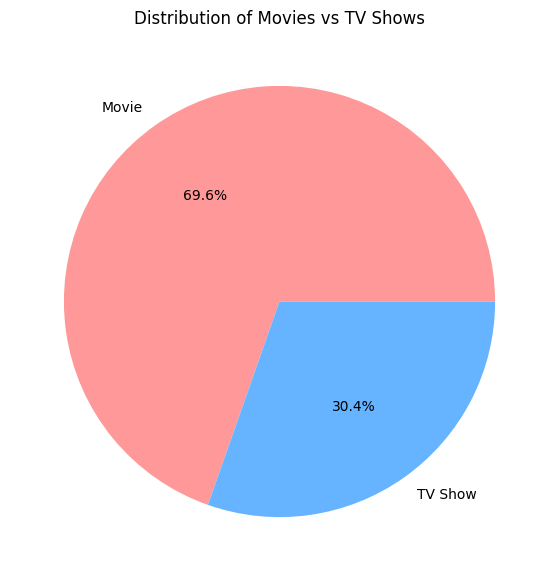

In [4]:
# 2. Distribution of content types
content_distribution = df['type'].value_counts()
print(content_distribution)

# Pie chart of content distribution
plt.figure(figsize=(7,7))
content_distribution.plot(kind='pie', autopct='%1.1f%%', colors=['#ff9999','#66b3ff'])
plt.title('Distribution of Movies vs TV Shows')
plt.ylabel('')
plt.show()

In [9]:
# Ensure 'duration' is numeric and clean up invalid entries
df['duration'] = pd.to_numeric(df['duration'], errors='coerce')

# Separate the data for Movies and TV Shows
movie_data = df[df['type'] == 'Movie']
tvshow_data = df[df['type'] == 'TV Show']

# Check the number of valid entries for each type (optional)
print(f"Number of valid movie entries: {movie_data.shape[0]}")
print(f"Number of valid TV Show entries: {tvshow_data.shape[0]}")

Number of valid movie entries: 6131
Number of valid TV Show entries: 2676


<ipython-input-6-b483e59bf466>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.index, y=top_genres.values, palette='viridis')


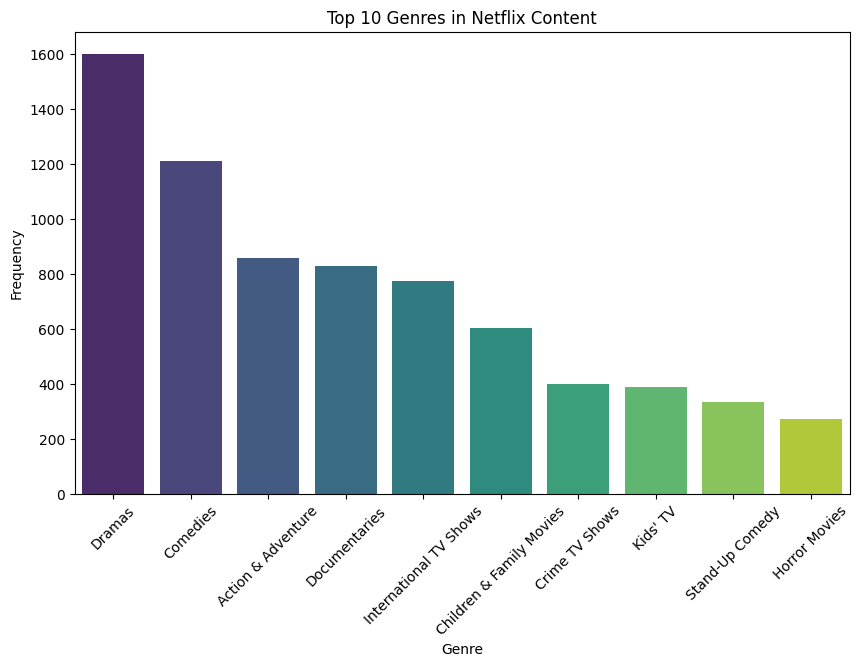

In [6]:
# 4. Top Genres in Netflix Content
# Create a column for genres
df['genres'] = df['listed_in'].str.split(',').apply(lambda x: x[0])

# Plot the top genres
top_genres = df['genres'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=top_genres.index, y=top_genres.values, palette='viridis')
plt.title('Top 10 Genres in Netflix Content')
plt.xlabel('Genre')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()

<ipython-input-7-888d41fe6bf3>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['country'].fillna('Unknown', inplace=True)
<ipython-input-7-888d41fe6bf3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=country_counts.index, y=country_counts.values, palette='coolwarm')


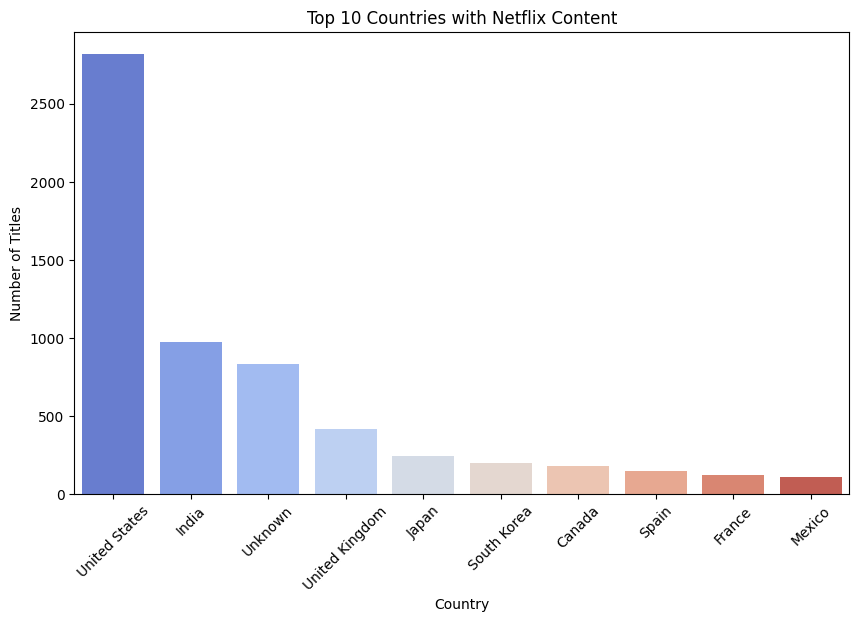

In [7]:
# 5. Most Popular Countries
# Clean up and count by country
df['country'].fillna('Unknown', inplace=True)
country_counts = df['country'].value_counts().head(10)
plt.figure(figsize=(10,6))
sns.barplot(x=country_counts.index, y=country_counts.values, palette='coolwarm')
plt.title('Top 10 Countries with Netflix Content')
plt.xlabel('Country')
plt.ylabel('Number of Titles')
plt.xticks(rotation=45)
plt.show()